#### Lightgbm for regression with categorical data
- one hot encodingしなくて、lgbmのCategorical Feature Supportを利用する。  
https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

# lightgbmのplotを実行すると、styleの設定が変わるので、実行前に変数に保存しておく。
inline_rc = dict(mpl.rcParams)

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import r2_score

def plot_result(y_train, y_train_pred, y_test, y_test_pred, label='テスト'): 
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'訓練データ, R$^2$={round(r2_score(y_train, y_train_pred), 3)}')
    plt.subplot(122)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'{label}データ, R$^2$={round(r2_score(y_test, y_test_pred), 3)}')
    plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv', index_col='年月日')
df

,観客数,勝敗,対戦相手,先発投手,試合時間,球場,年,月,日,曜日,降水量の合計(mm),平均気温(℃),スコア(ホーム),スコア(相手),スコア(合計),スコア(差),直前試合のスコア(ホーム),直前試合のスコア(相手),直前試合のスコア(合計),直前試合のスコア(差),直前試合の勝敗,月別平均観客数,日別平均観客数
年月日,,,,,,,,,,,,,,,,,,,,,,,
2009/4/7,24011,○,オリックス,岸,196,西武ドーム,2009,4,7,火,0.0,14.2,8,3,11,5,3,2,7,1,△,17693.64,18786.29
2009/4/8,10001,●,オリックス,石井一,185,西武ドーム,2009,4,8,水,0.0,14.1,2,10,12,-8,8,3,11,5,○,17693.64,17143.54
2009/4/9,9813,○,オリックス,西口,177,西武ドーム,2009,4,9,木,0.0,16.5,13,6,19,7,2,10,12,-8,●,17693.64,18510.93
2009/4/17,15181,●,日本ハム,涌井,200,西武ドーム,2009,4,17,金,5.0,10.8,2,4,6,-2,13,6,19,7,○,17693.64,20806.97
2009/4/18,28525,●,日本ハム,帆足,204,西武ドーム,2009,4,18,土,0.0,13.6,4,6,10,-2,2,4,6,-2,●,17693.64,19713.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/9/19,27475,●,楽天,その他,257,西武ドーム,2022,9,19,月,48.5,26.1,4,6,10,-2,3,4,7,-1,●,20473.55,19628.91
2022/9/20,14063,○,楽天,その他,172,西武ドーム,2022,9,20,火,15.5,22.3,4,1,5,3,4,6,10,-2,●,20473.55,20765.17
2022/9/27,24030,○,ソフトバンク,その他,168,西武ドーム,2022,9,27,火,0.0,22.6,4,1,5,3,4,1,5,3,○,20473.55,21138.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   勝敗             978 non-null    object 
 2   対戦相手           978 non-null    object 
 3   先発投手           978 non-null    object 
 4   試合時間           978 non-null    int64  
 5   球場             978 non-null    object 
 6   年              978 non-null    int64  
 7   月              978 non-null    int64  
 8   日              978 non-null    int64  
 9   曜日             978 non-null    object 
 10  降水量の合計(mm)     978 non-null    float64
 11  平均気温(℃)        978 non-null    float64
 12  スコア(ホーム)       978 non-null    int64  
 13  スコア(相手)        978 non-null    int64  
 14  スコア(合計)        978 non-null    int64  
 15  スコア(差)         978 non-null    int64  
 16  直前試合のスコア(ホーム)  978 non-null    int64  
 17  直前試合のスコア(相手)   978 non-null    int64  
 18  直前

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   観客数            978 non-null    int64   
 1   勝敗             978 non-null    category
 2   対戦相手           978 non-null    category
 3   先発投手           978 non-null    category
 4   試合時間           978 non-null    int64   
 5   球場             978 non-null    category
 6   年              978 non-null    int64   
 7   月              978 non-null    int64   
 8   日              978 non-null    int64   
 9   曜日             978 non-null    category
 10  降水量の合計(mm)     978 non-null    float64 
 11  平均気温(℃)        978 non-null    float64 
 12  スコア(ホーム)       978 non-null    int64   
 13  スコア(相手)        978 non-null    int64   
 14  スコア(合計)        978 non-null    int64   
 15  スコア(差)         978 non-null    int64   
 16  直前試合のスコア(ホーム)  978 non-null    int64   
 17  直前試合のスコア(相手)   978 non-null

In [7]:
X = df.loc[:, df.columns != '観客数']
y = df['観客数']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
import optuna
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import warnings

class SilentLGBMRegressor(lgb.LGBMRegressor):
    def fit(self, *args, **kwargs):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            return super().fit(*args, **kwargs)

def objective(trial):
    param = {
        'metric': 'rmse', 
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'max_depth': trial.suggest_categorical('max_depth', [10, 20, 50, 80, 100]),
        'num_leaves' : trial.suggest_int('num_leaves', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 500)
    }
    lgbm = SilentLGBMRegressor(n_jobs=-1, **param)
    callbacks=[lgb.early_stopping(100, verbose=False), lgb.log_evaluation(period=0)]
    lgbm.fit(X_train_opt, y_train_opt, eval_set=(X_valid_opt, y_valid_opt), callbacks=callbacks)
    y_val_opt_preds = lgbm.predict(X_valid_opt)
    return r2_score(y_valid_opt, y_val_opt_preds)

In [9]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-06-23 19:40:00,412] A new study created in memory with name: no-name-e8871f4a-bf49-4d84-ac96-98a514010037
[I 2023-06-23 19:40:00,496] Trial 0 finished with value: -0.005221227671023065 and parameters: {'n_estimators': 5617, 'reg_alpha': 0.7963044240810426, 'reg_lambda': 0.23283026129966128, 'learning_rate': 0.00027590081054416075, 'colsample_bytree': 0.47281484537652513, 'subsample': 0.3657768721437625, 'max_depth': 20, 'num_leaves': 422, 'min_child_samples': 385}. Best is trial 0 with value: -0.005221227671023065.
[I 2023-06-23 19:40:00,552] Trial 1 finished with value: -0.005221227671023065 and parameters: {'n_estimators': 5513, 'reg_alpha': 0.028614215538168217, 'reg_lambda': 0.01275447326204016, 'learning_rate': 0.0011527617675610533, 'colsample_bytree': 0.49842416460907896, 'subsample': 0.6541615495938462, 'max_depth': 100, 'num_leaves': 135, 'min_child_samples': 492}. Best is trial 0 with value: -0.005221227671023065.
[I 2023-06-23 19:40:03,750] Trial 2 finished with valu

In [10]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'n_estimators': 1395, 'reg_alpha': 0.0010466819856140507, 'reg_lambda': 0.17089439533247702, 'learning_rate': 0.009970740678185581, 'colsample_bytree': 0.6708346612252268, 'subsample': 0.5280369258302683, 'max_depth': 20, 'num_leaves': 910, 'min_child_samples': 33}


/var/folders/7d/g6cftgkn73xdpn_wddqnr2y80000gn/T/ipykernel_25380/1455980257.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<AxesSubplot: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

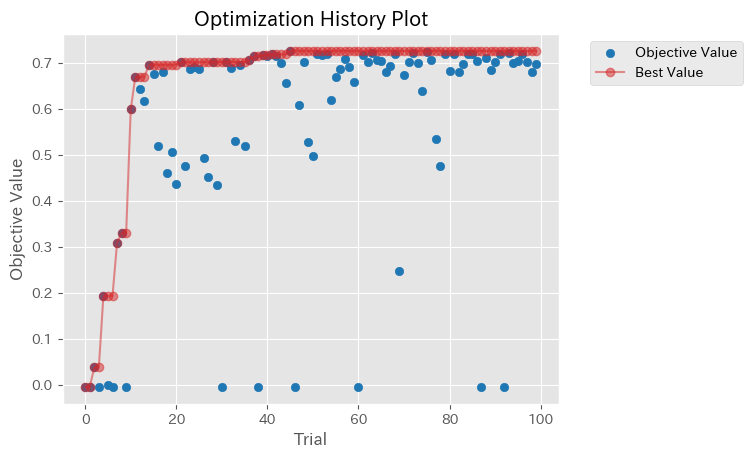

In [11]:
optuna.visualization.matplotlib.plot_optimization_history(study)

/var/folders/7d/g6cftgkn73xdpn_wddqnr2y80000gn/T/ipykernel_25380/1036994904.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<AxesSubplot: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

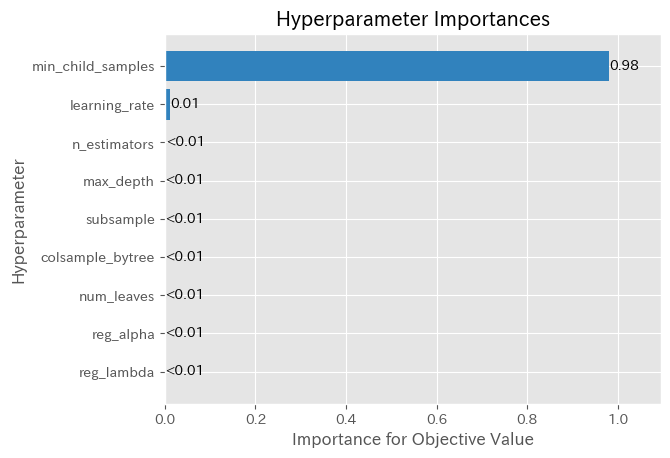

In [12]:
optuna.visualization.matplotlib.plot_param_importances(study)

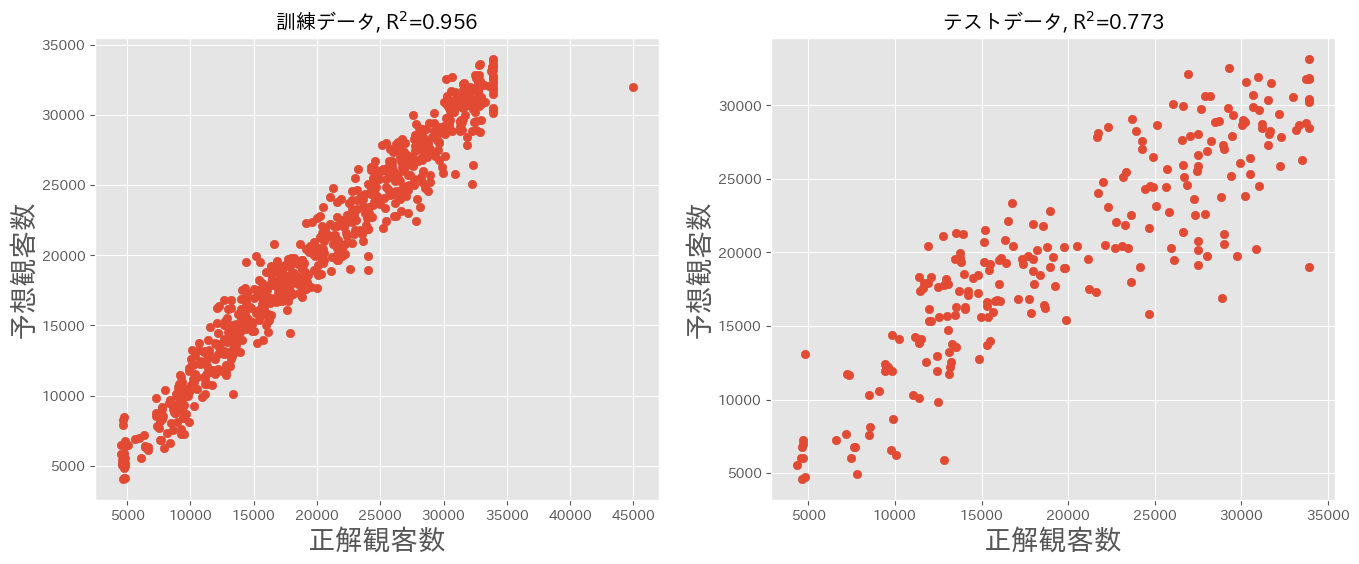

In [13]:
lgbm = LGBMRegressor(**study.best_params)
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
plot_result(y_train, y_train_pred, y_test, y_test_pred)

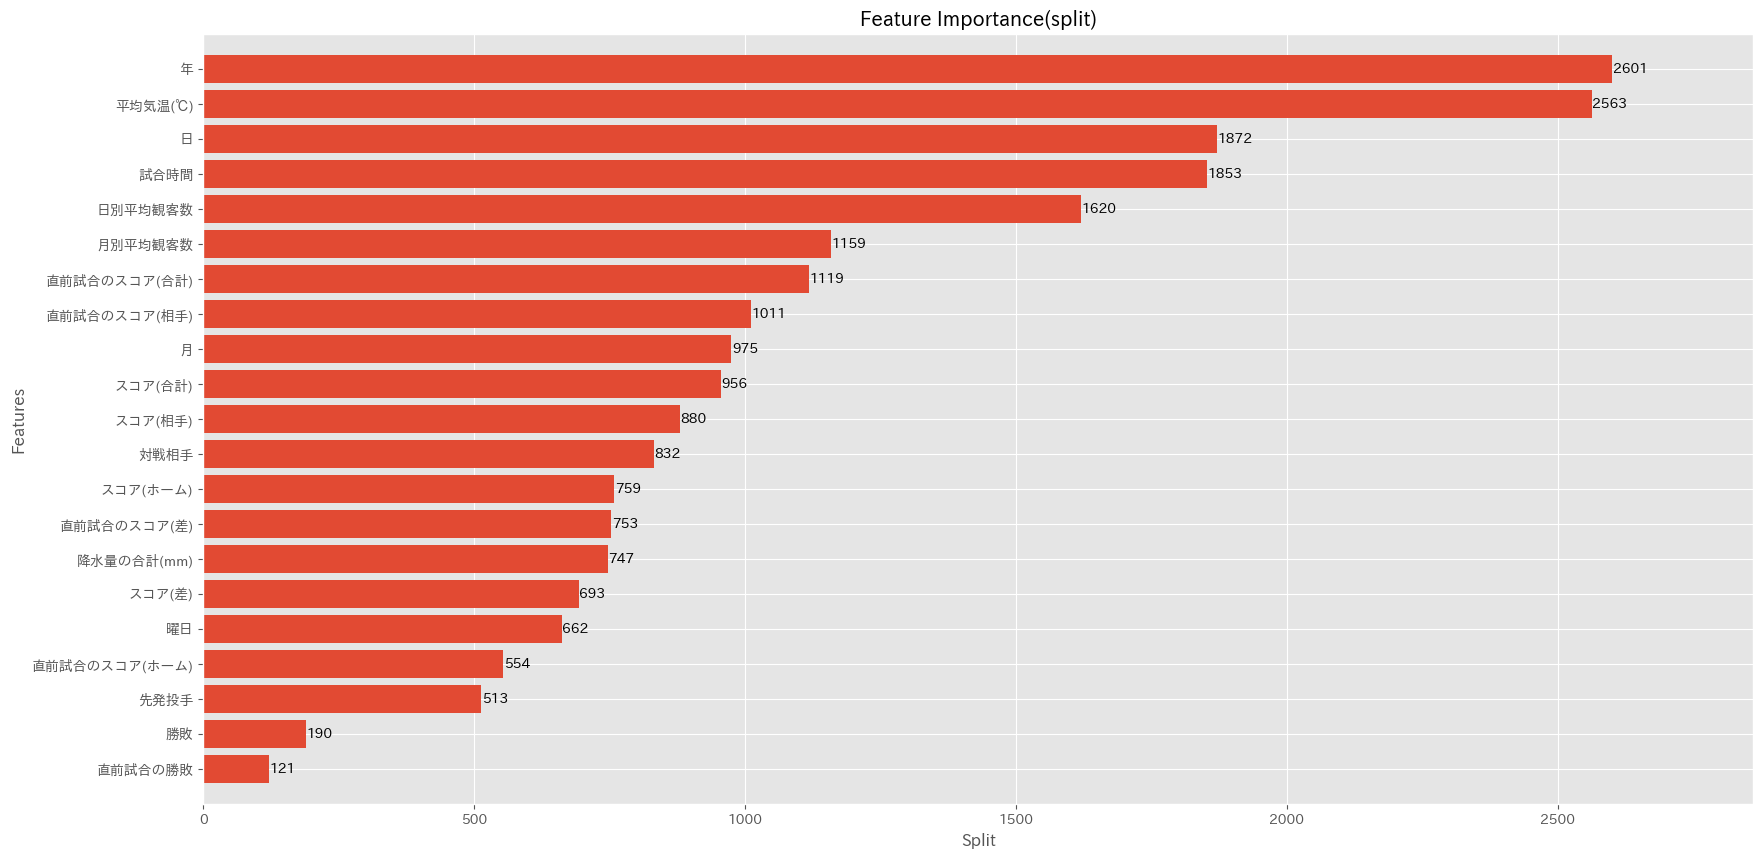

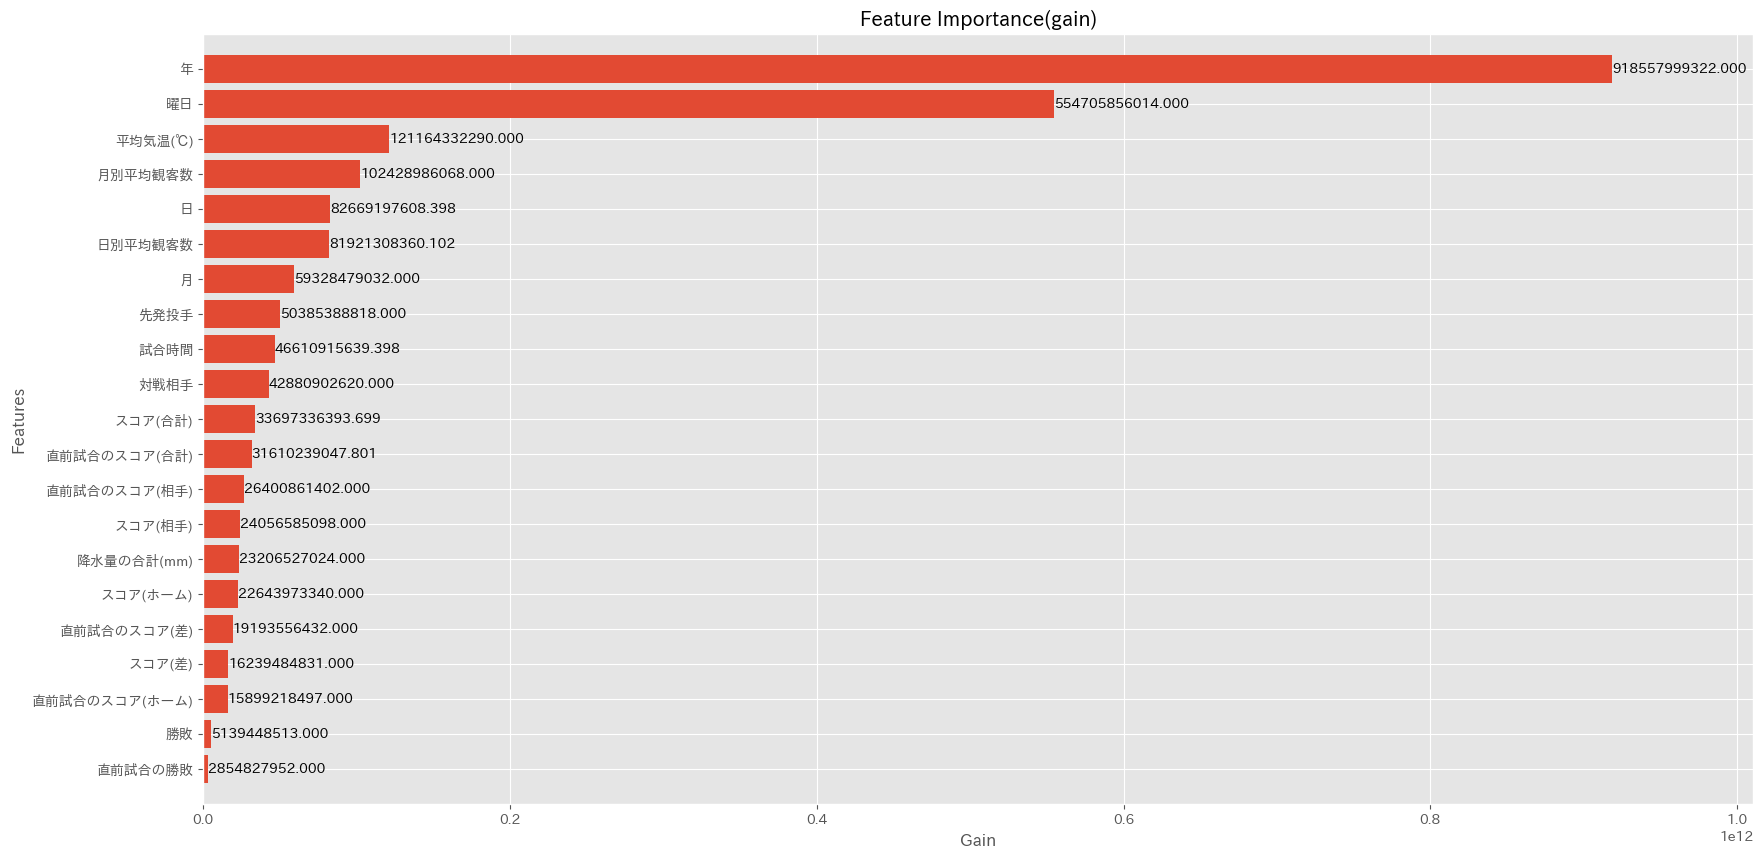

In [14]:
for type_ in ['split', 'gain']:
    lgb.plot_importance(lgbm, xlabel=type_.capitalize(), importance_type=type_, title=f'Feature Importance({type_})', figsize=(20, 10), height=.8)

In [15]:
import joblib

joblib.dump(lgbm, 'lgbm_category.pkl')

['lgbm_category.pkl']

In [16]:
# styleをもとの設定に戻す。
mpl.rcParams.update(inline_rc)

In [19]:
import shap

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

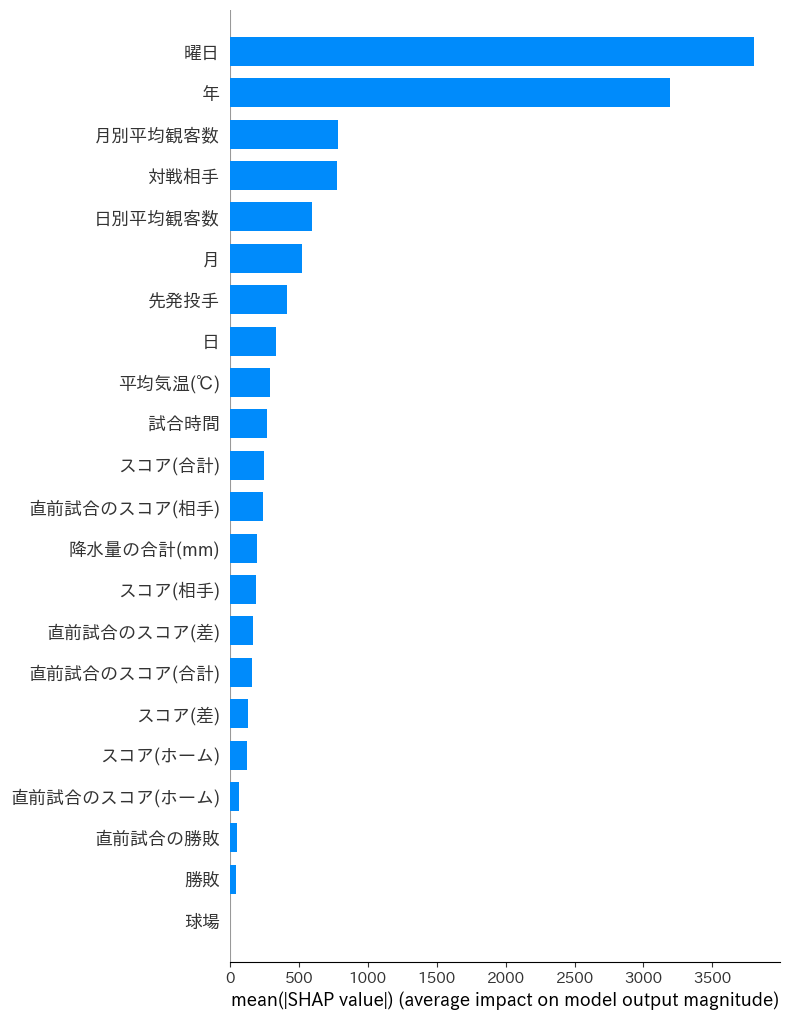

In [21]:
shap.summary_plot(shap_values, X_test, max_display=30, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


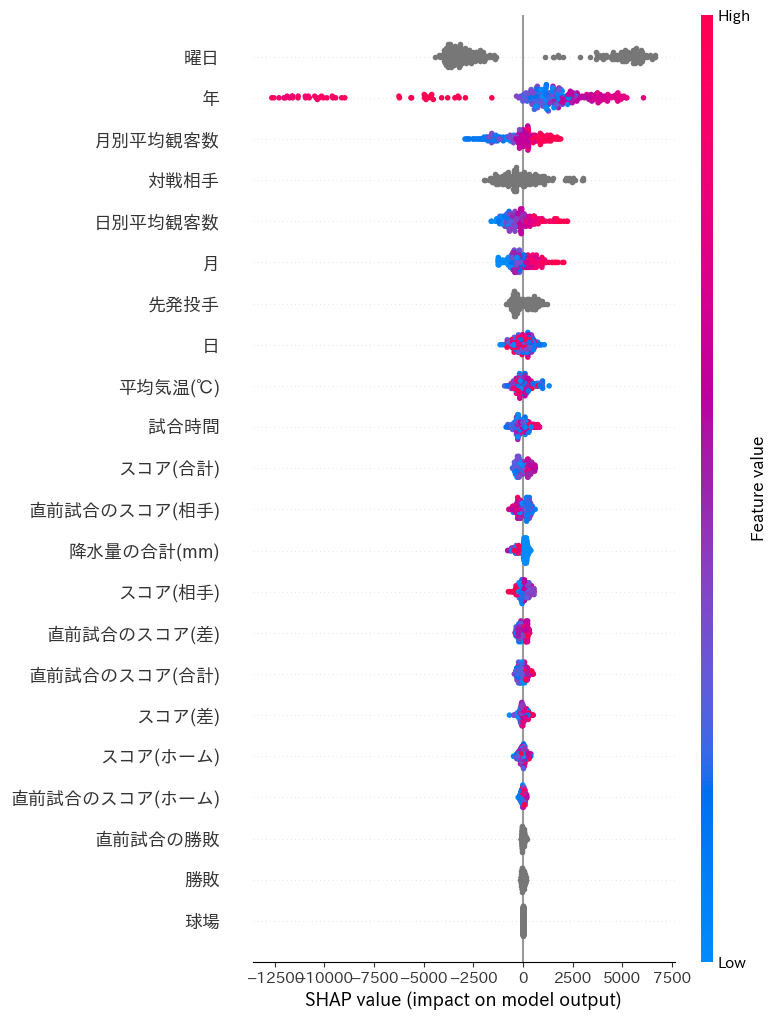

In [22]:
# Grey represents the categorical values which cannot be scaled in high or low.
shap.summary_plot(shap_values, X_test, max_display=30)

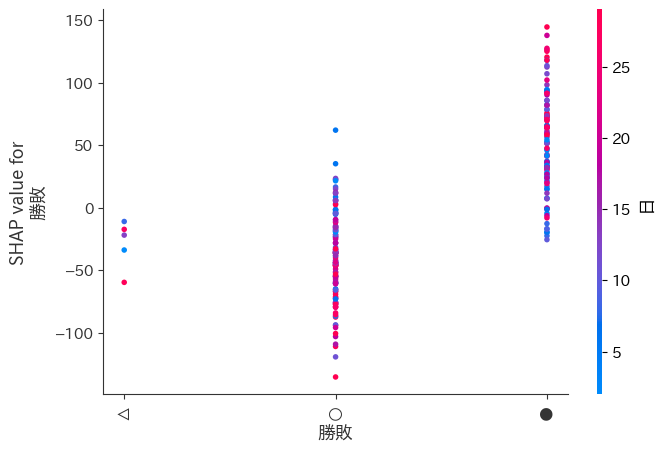

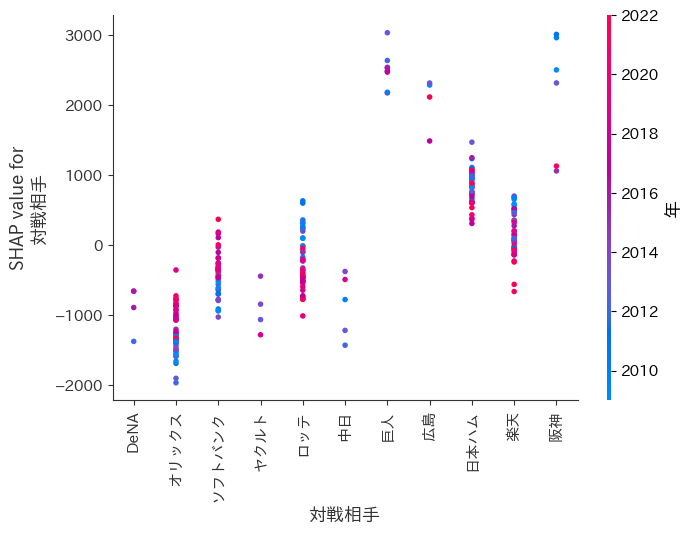

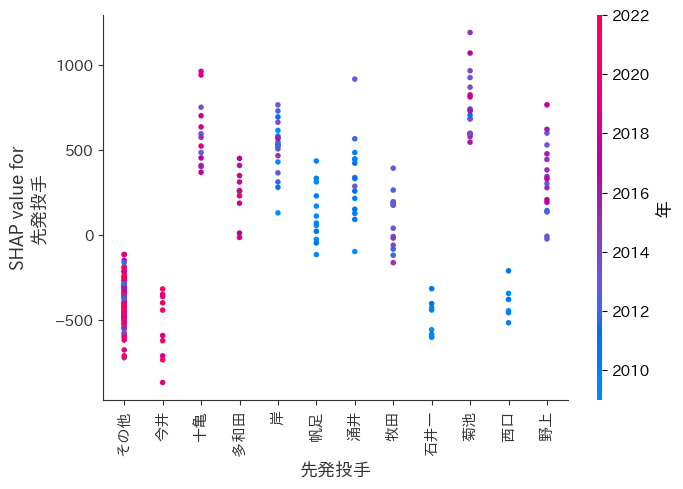

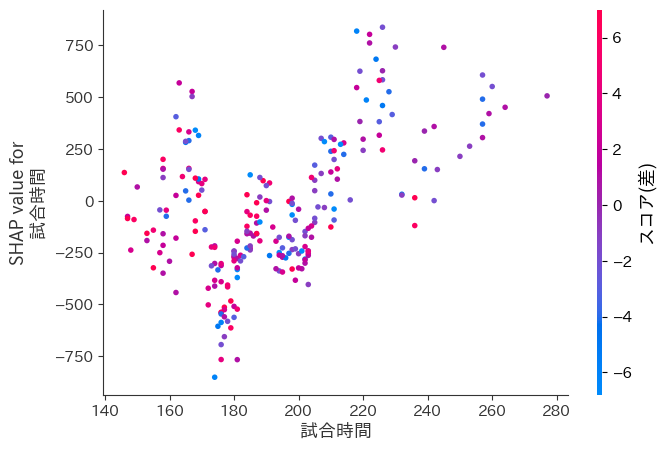

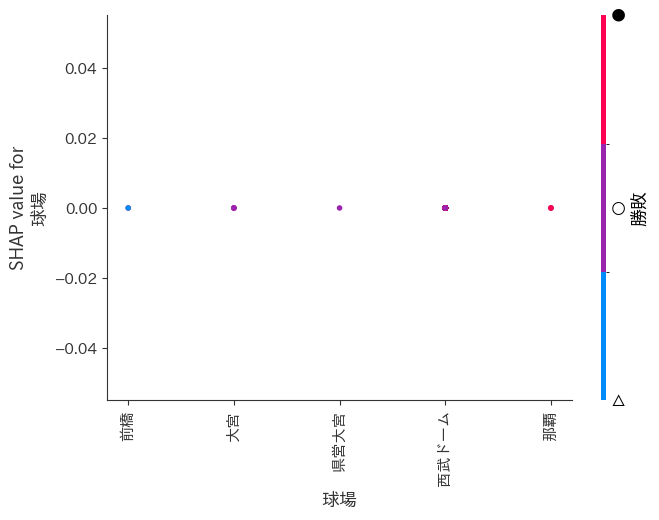

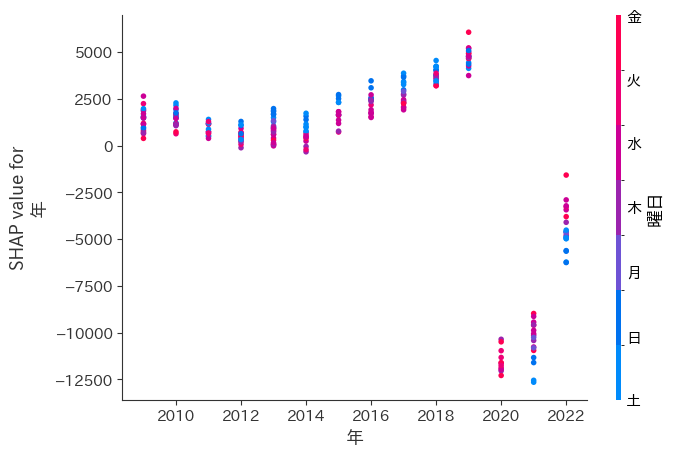

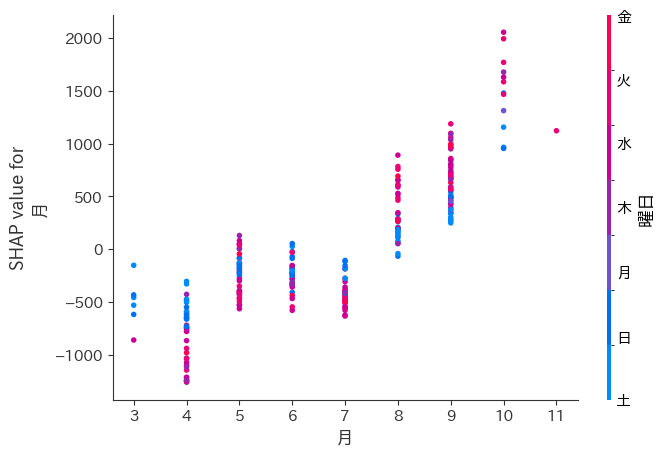

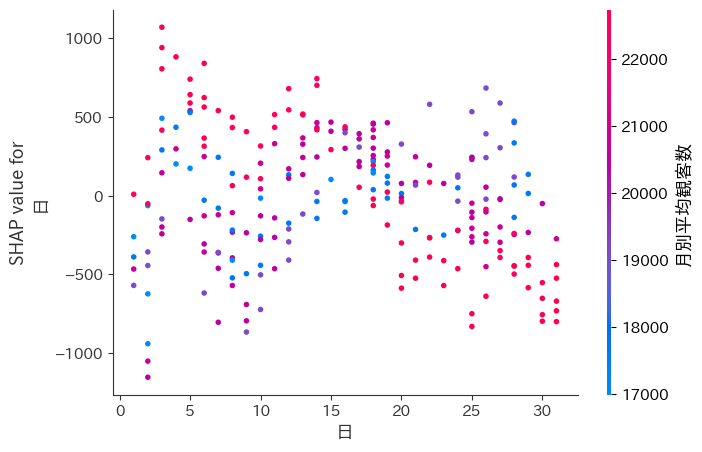

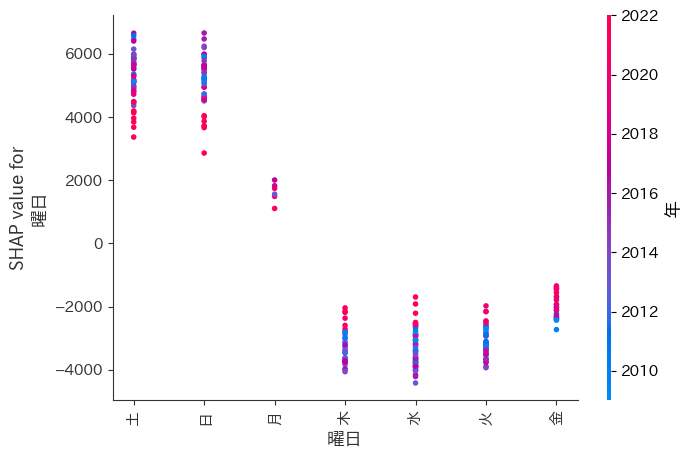

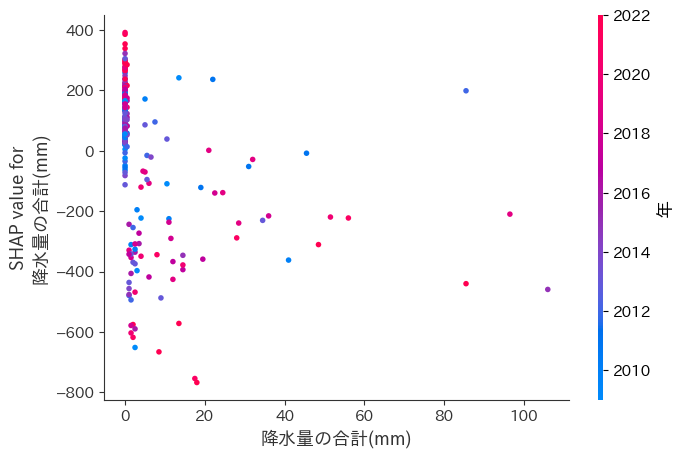

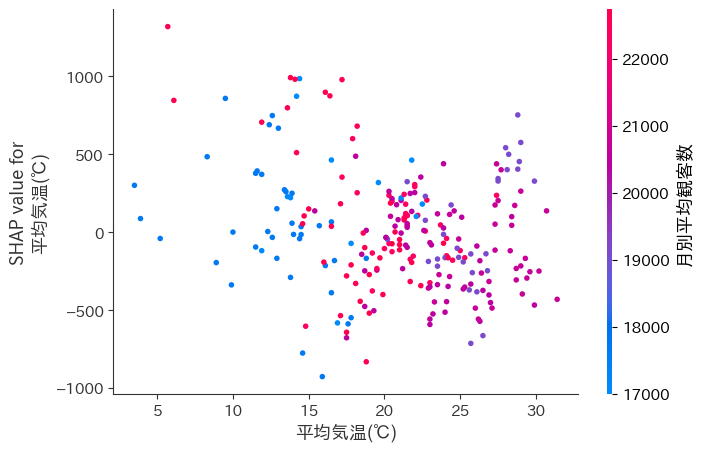

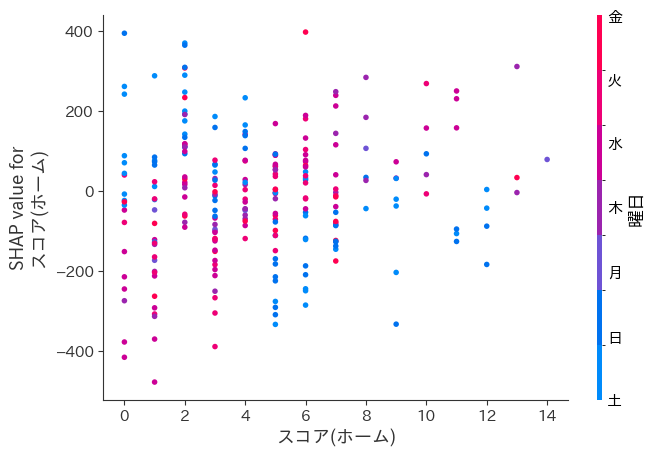

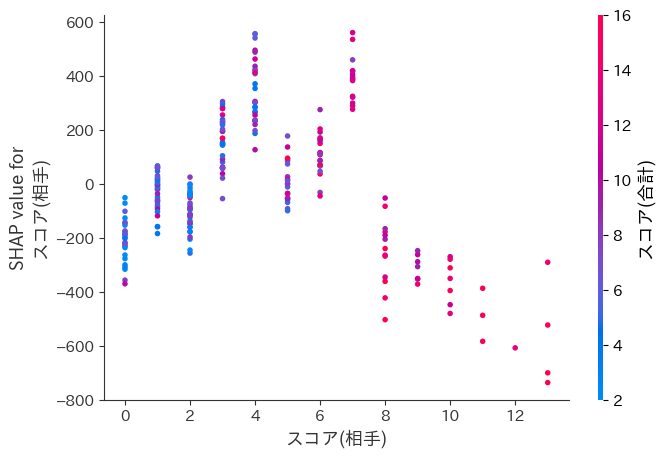

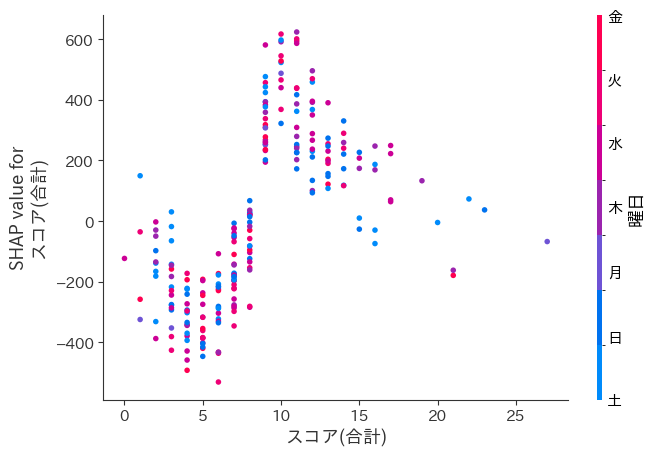

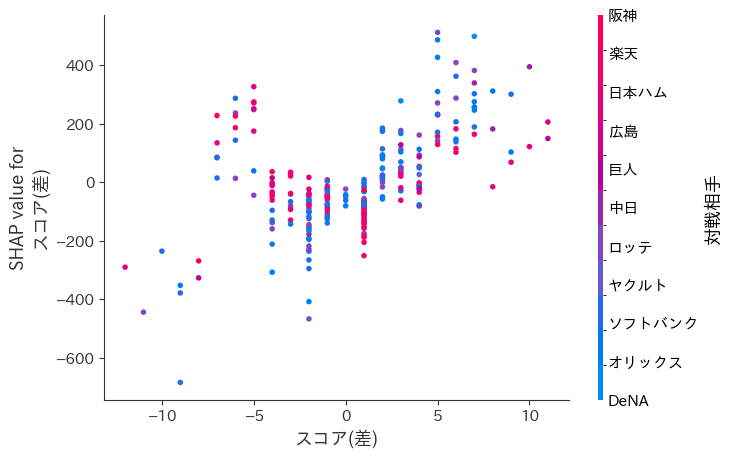

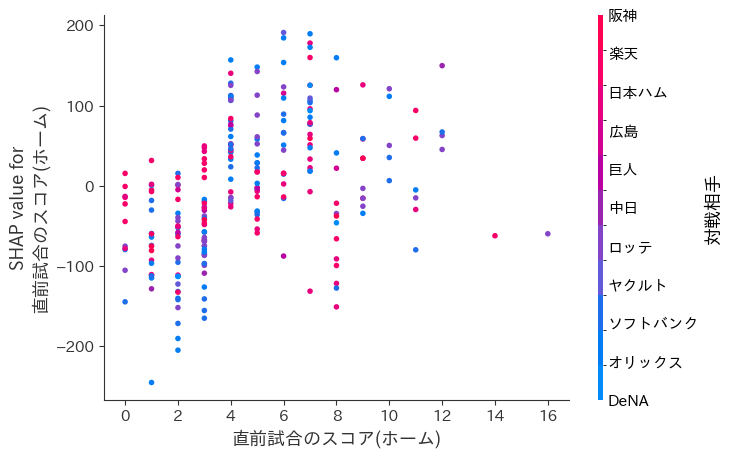

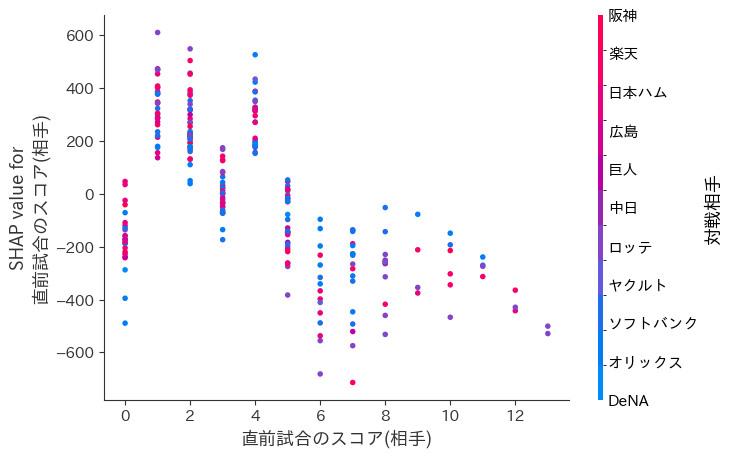

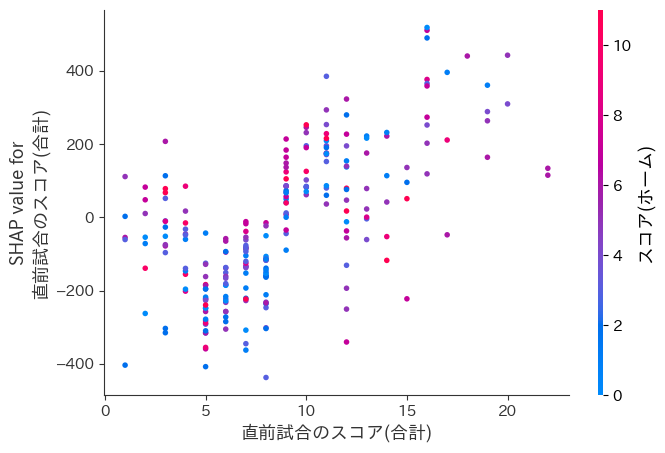

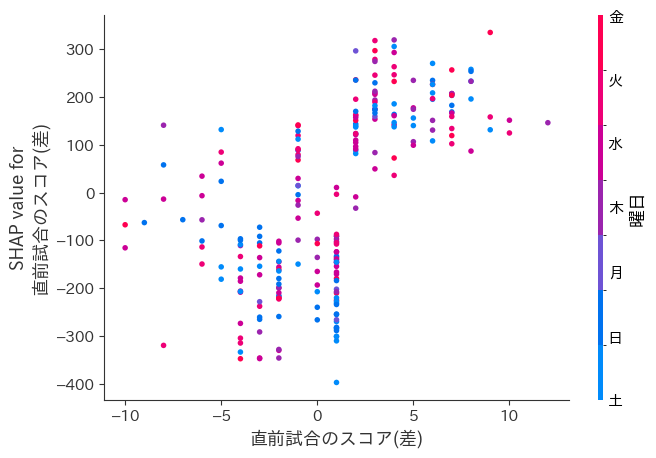

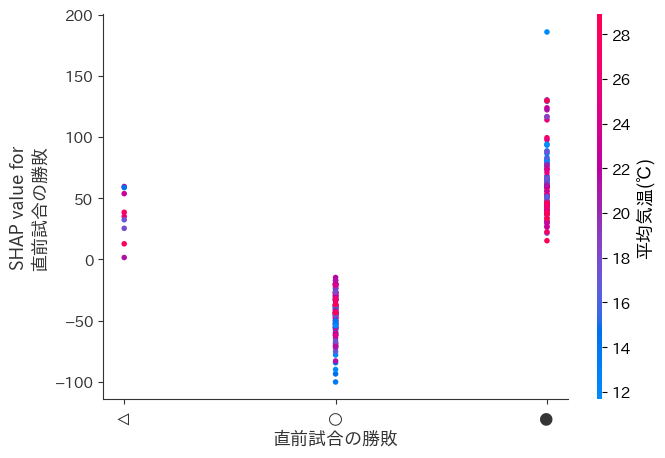

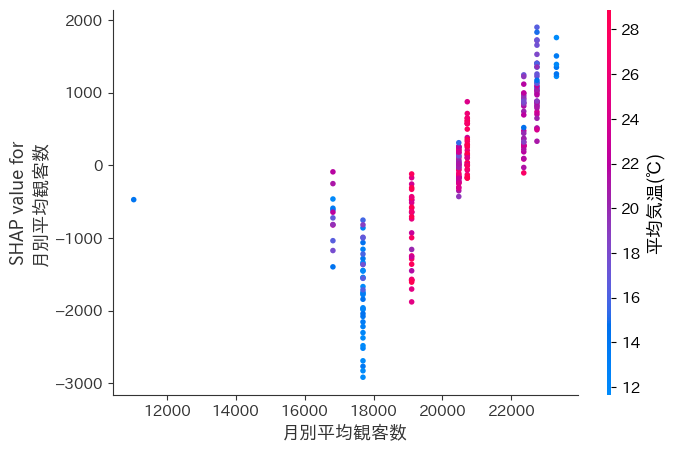

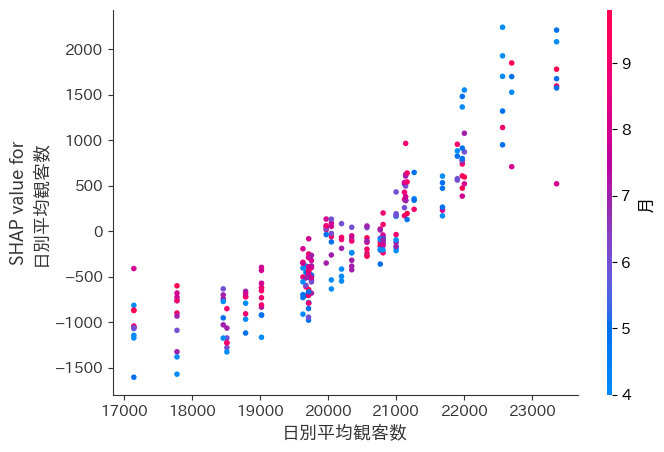

In [24]:
for name in X_test.columns:    
    shap.dependence_plot(name, shap_values, X_test)

In [26]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

#### 年別平均観客数featureの追加
- 年が一番重要なfeatureだったので、年関連featureを追加して、分析してみる。

In [56]:
df_column_added = pd.read_csv('data.csv', index_col='年月日')
for col in df_column_added.columns:
    if df_column_added[col].dtype == 'object':
        df_column_added[col] = df_column_added[col].astype('category')
df_column_added['年別平均観客数'] = df.groupby(by='年')['観客数'].transform('mean').round(2)
X = df_column_added.loc[:, df_column_added.columns != '観客数']
y = df_column_added['観客数']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [57]:
df_column_added.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   観客数            978 non-null    int64   
 1   勝敗             978 non-null    category
 2   対戦相手           978 non-null    category
 3   先発投手           978 non-null    category
 4   試合時間           978 non-null    int64   
 5   球場             978 non-null    category
 6   年              978 non-null    int64   
 7   月              978 non-null    int64   
 8   日              978 non-null    int64   
 9   曜日             978 non-null    category
 10  降水量の合計(mm)     978 non-null    float64 
 11  平均気温(℃)        978 non-null    float64 
 12  スコア(ホーム)       978 non-null    int64   
 13  スコア(相手)        978 non-null    int64   
 14  スコア(合計)        978 non-null    int64   
 15  スコア(差)         978 non-null    int64   
 16  直前試合のスコア(ホーム)  978 non-null    int64   
 17  直前試合のスコア(相手)   978 non-null

In [58]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-06-23 22:52:50,169] A new study created in memory with name: no-name-8c9654e8-d3a0-4418-84f9-e6408b46ad4a
[I 2023-06-23 22:52:50,234] Trial 0 finished with value: -0.005221227671023065 and parameters: {'n_estimators': 2532, 'reg_alpha': 3.473024504837833, 'reg_lambda': 0.0039801916684830295, 'learning_rate': 0.0008863272601660798, 'colsample_bytree': 0.6894385566510066, 'subsample': 0.583970367291526, 'max_depth': 80, 'num_leaves': 659, 'min_child_samples': 359}. Best is trial 0 with value: -0.005221227671023065.
[I 2023-06-23 22:52:50,302] Trial 1 finished with value: -0.005221227671023065 and parameters: {'n_estimators': 3412, 'reg_alpha': 0.015976431688081404, 'reg_lambda': 4.886675362412442, 'learning_rate': 6.032662943567192e-05, 'colsample_bytree': 0.9380545437000696, 'subsample': 0.3709144675142459, 'max_depth': 10, 'num_leaves': 720, 'min_child_samples': 341}. Best is trial 0 with value: -0.005221227671023065.
[I 2023-06-23 22:52:54,364] Trial 2 finished with value: 0.6

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.


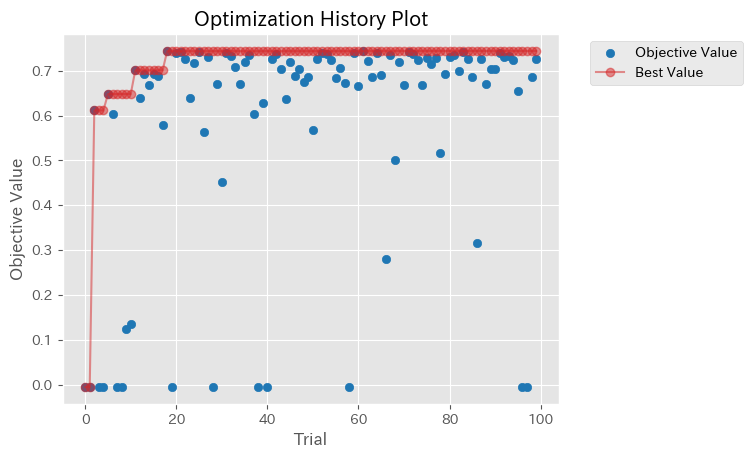

In [68]:
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.


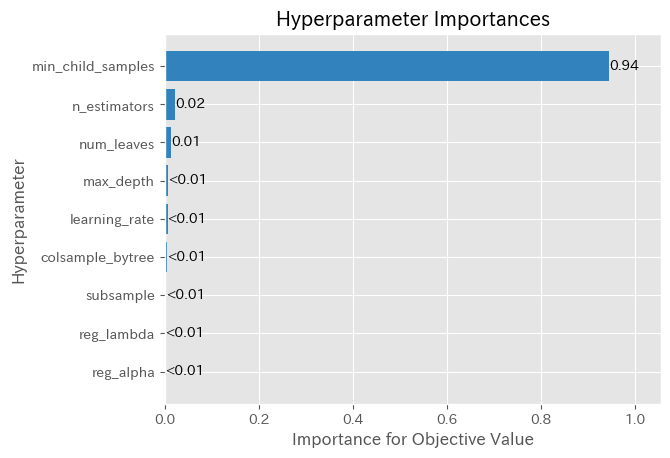

In [74]:
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

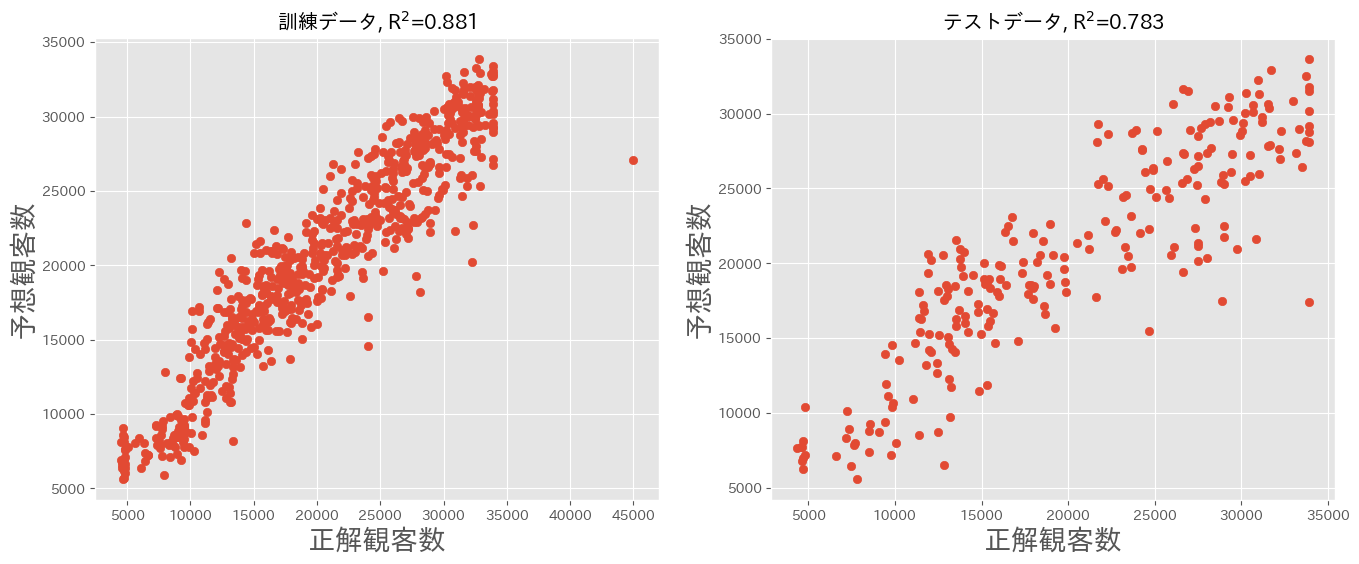

In [70]:
lgbm = LGBMRegressor(**study.best_params)
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
plot_result(y_train, y_train_pred, y_test, y_test_pred)

In [71]:
mpl.rcParams.update(inline_rc)

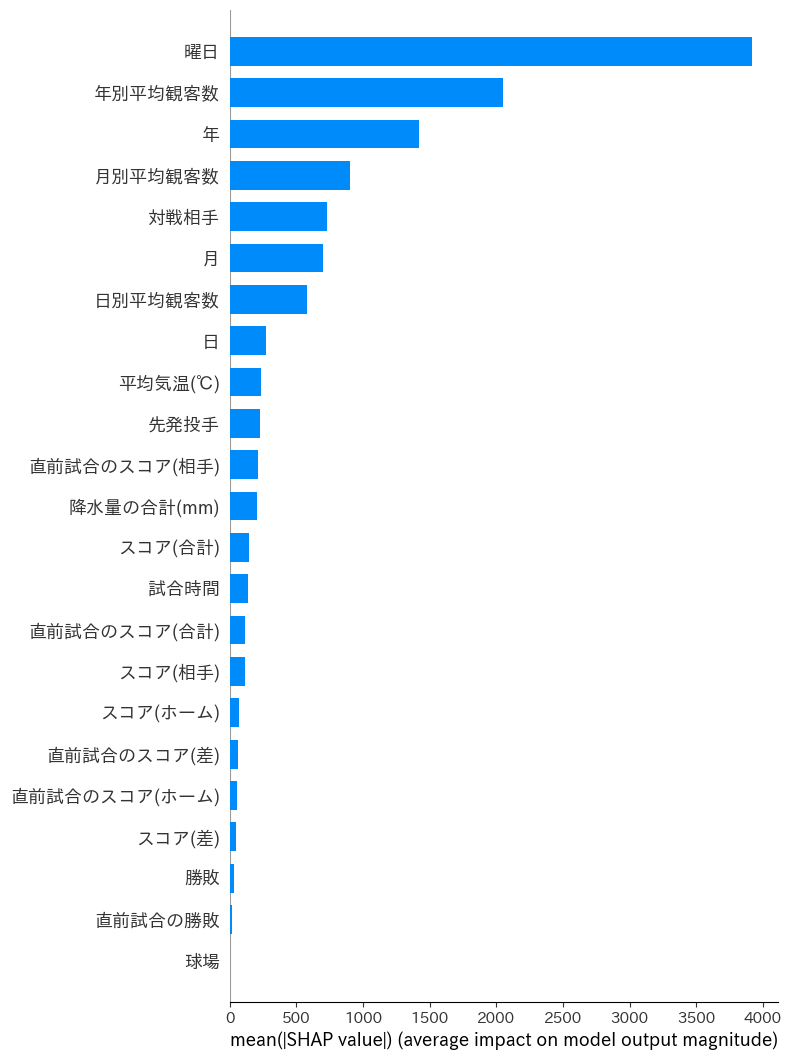

In [72]:
import shap

explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


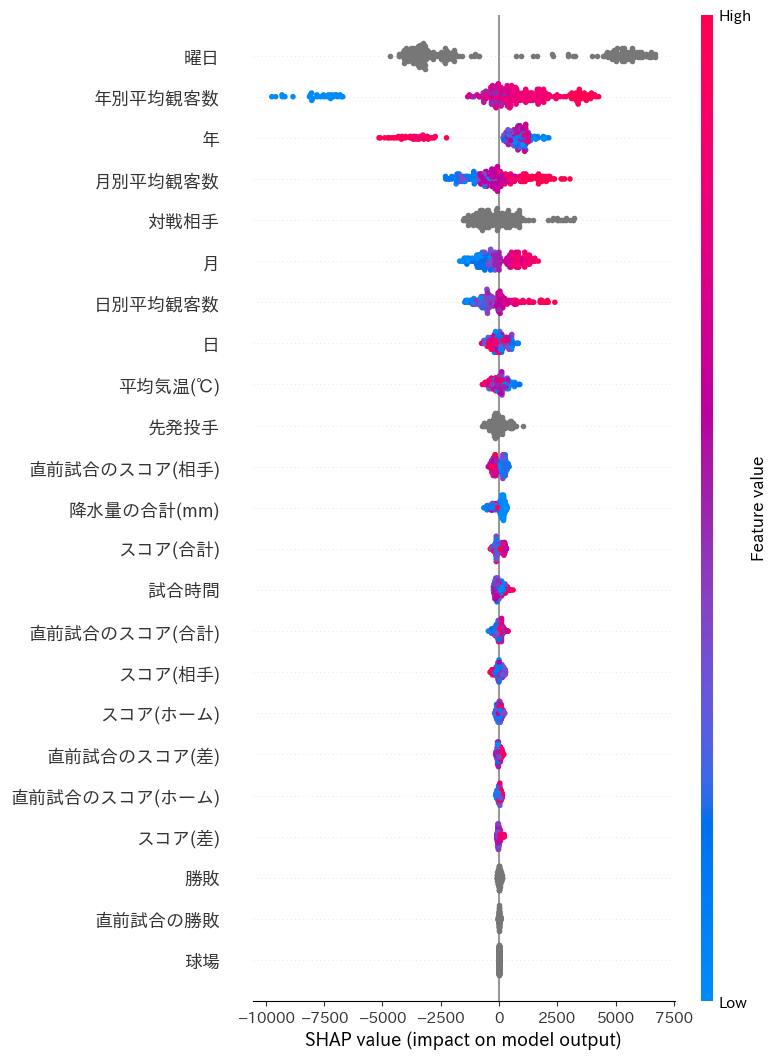

In [73]:
shap.summary_plot(shap_values, X_test, max_display=30)